In [1]:
# CLASS 8 CLASS 

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [4]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


this is wASHINGTON DC bike share program 
- have season telling 1 - jan to march 2- april to june 3- july to dec 4- oct to dec 
- holiday tells if stat holdiay or not 1 meaning is holoiday 
- working day - mon to fri vs sat and sun 
- weather severity 1 mild 4 very bad
- temp in celc
- atemp - what it feels like 
- humidity 100 rain 
- windspeed 
- casual renter- just walking by 
- registered - have accoutns subscriptions with registed acount 
- count is total of casual and registed 

- rows are hourly total hourly 



#### going to do a bit of feature engineering and one hot encoding####

In [5]:
## starting with anaysis and data preperation (this is clean data set just going to feature engineer)
## fisrt check data types 

In [6]:
## convert date time to datetime variable 
bikes['datetime'] = pd.to_datetime(bikes['datetime'])

In [7]:
## first start with hour valiables 
## when in datetime can extract with lambda x whcih allows extracting from date time 
bikes['hour'] = bikes['datetime'].apply(lambda x: x.hour)

In [8]:
bikes.head(
    
)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [9]:
# new function for time of day -- logic if x is greater than 0 (midnight) and less than 9 then return commute 
# when returning stringds ensure you have no space so because we are one hot encoding 
def time_of_day(x):
    if x >=3 and x <= 9:
        return 'morning_commute'
    elif x >= 10 and x <= 14:
        return 'midday'
    elif x >= 15 and x <= 19:
        return 'evening_commute'
    elif x >= 20 and x <= 23:
        return 'after_hours'
    else:
        return 'late_night'

In [10]:
# will gice column that ells what time of day bijke was rented 
bikes['time_of_day'] = bikes['hour'].apply(time_of_day)

In [11]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,time_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,late_night
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,late_night
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,late_night
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,morning_commute
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,morning_commute


In [12]:
# can do analysis on hourly basis 
import seaborn as sns
import matplotlib.pyplot as plt


/var/folders/87/sf1gjrpx17vf465bggzmnr4m0000gn/T/ipykernel_42148/2872508721.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='casual', data=bikes, palette="tab10")


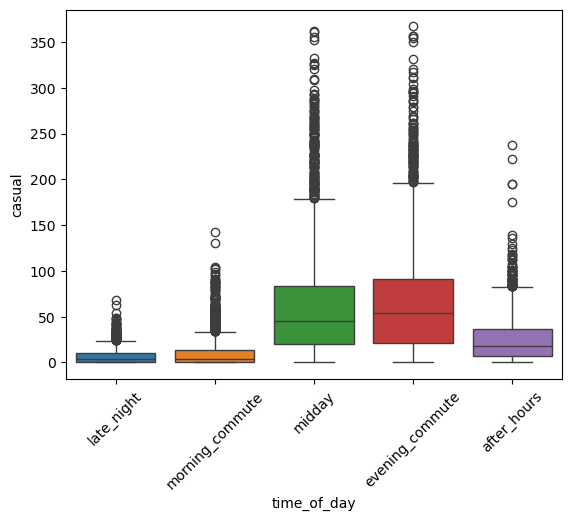

In [13]:
sns.boxplot(x='time_of_day', y='casual', data=bikes, palette="tab10")
plt.xticks(rotation=45);

/var/folders/87/sf1gjrpx17vf465bggzmnr4m0000gn/T/ipykernel_42148/3828010110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='time_of_day', y='registered', data=bikes, palette="rocket")


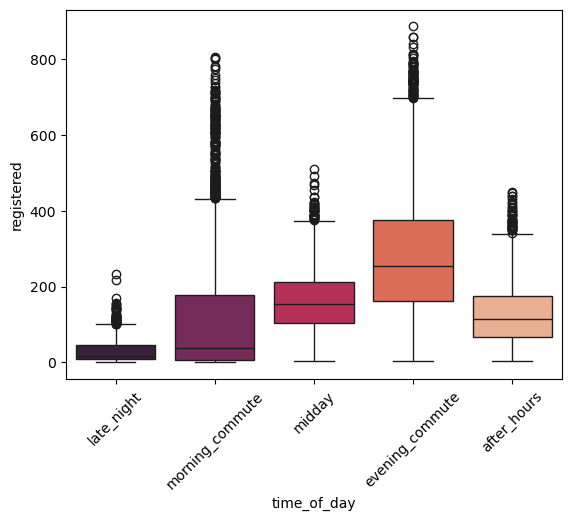

In [14]:
# difference for registered user 
sns.boxplot(x='time_of_day', y='registered', data=bikes, palette="rocket")
plt.xticks(rotation=45);

<Axes: xlabel='season', ylabel='count'>

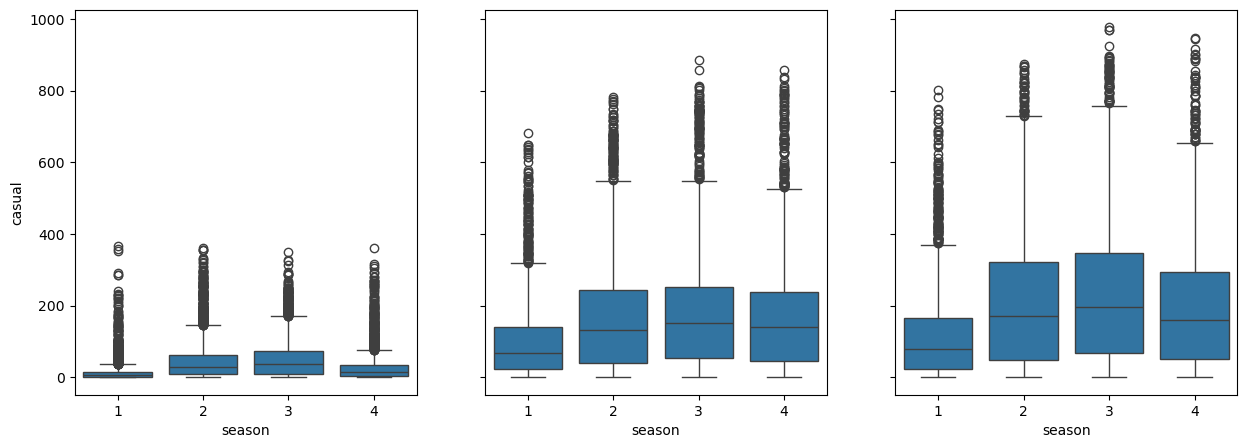

In [15]:
# continuing with univariant analysis 
# go down list 

# season , holiday,  workingday,  weather,   



fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='season', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='season', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='season', y='count', data=bikes, ax=ax3)

see more consisten behaviour in commuting for registered 
season may be good for predicting registered but not casual 

<Axes: xlabel='weather', ylabel='count'>

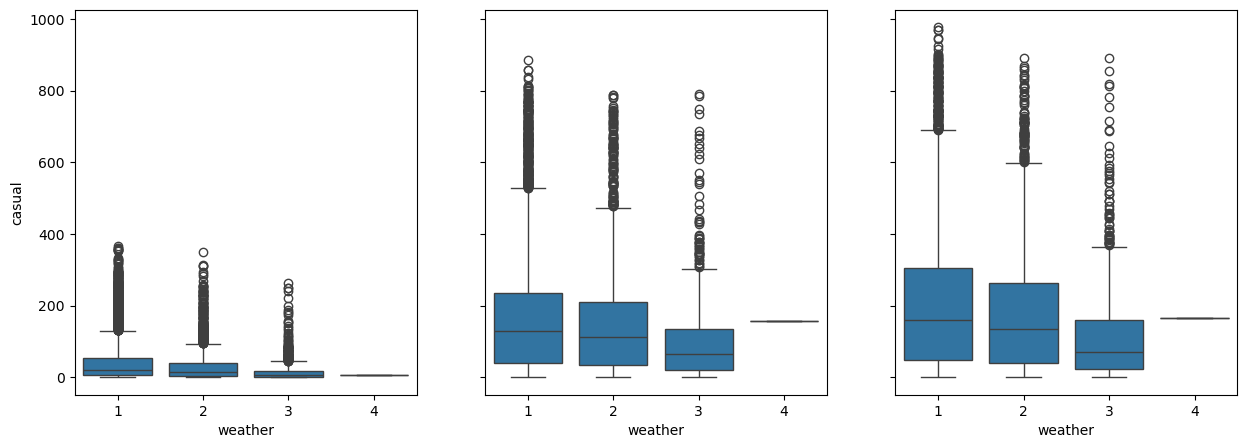

In [16]:
# weather 
xig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='weather', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='weather', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='weather', y='count', data=bikes, ax=ax3)

good weather points to more use and has greather impact 

In [17]:
#so far know season maybe kinda has influence weather kinda has influence 

<Axes: xlabel='holiday', ylabel='count'>

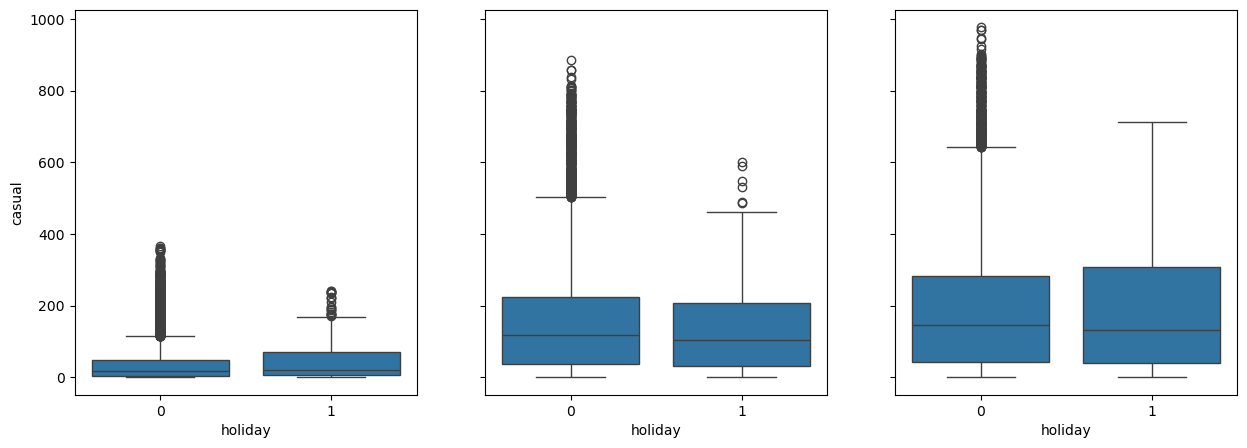

In [18]:
#holiday 
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='holiday', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='holiday', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='holiday', y='count', data=bikes, ax=ax3)

lift in casual but nothing impactful in other users 

<Axes: xlabel='workingday', ylabel='count'>

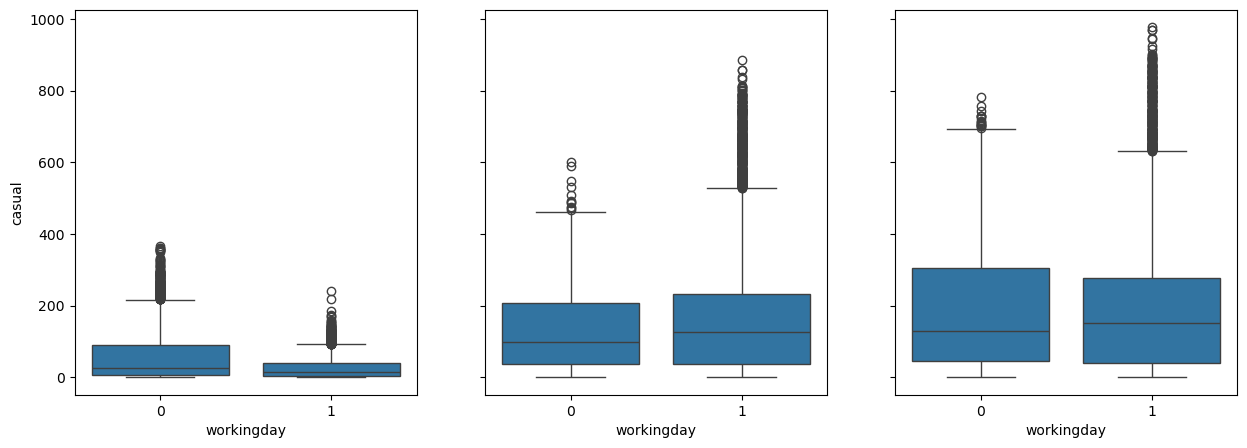

In [19]:
#working day 
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='workingday', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='workingday', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='workingday', y='count', data=bikes, ax=ax3)

more casual users when not workday registed users using bike a bit more when its working day good predicter for casual users 

In [20]:
# can ad weekday variable to get day of week 


<Axes: xlabel='weekday', ylabel='count'>

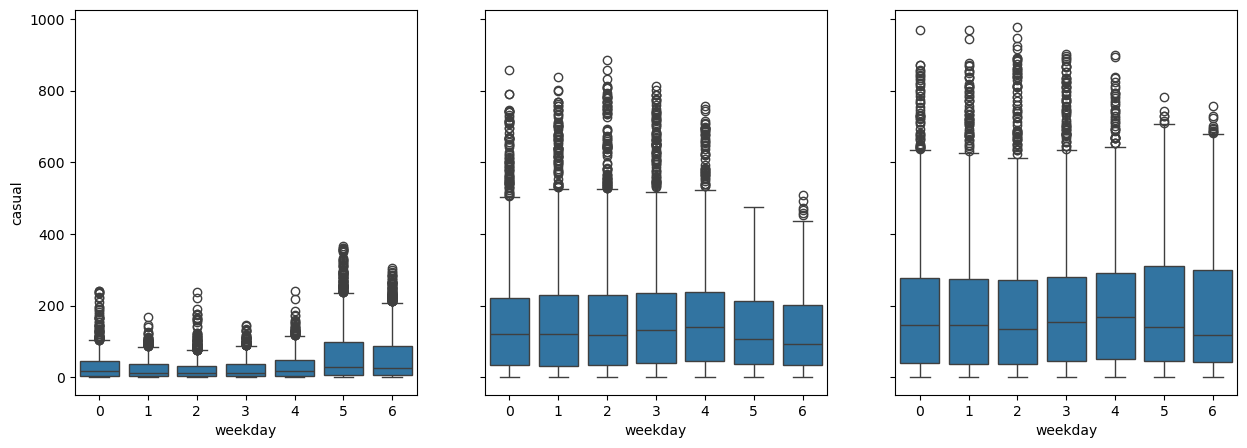

In [21]:
bikes['weekday'] = bikes['datetime'].apply(lambda x: x.weekday())
# monday zero 6 is sunday 

fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='weekday', y='casual', data=bikes, ax=ax1)
sns.boxplot(x='weekday', y='registered', data=bikes, ax=ax2)
sns.boxplot(x='weekday', y='count', data=bikes, ax=ax3)

for both registed and casula day of week is probably good variable to predict

seeing  behaviour is different for the two so may opt to build 2 models that build different 

many ways we can make bsuiness decisions 
but if have broader business question can aggregate business ie daily 

In [22]:
# create daily data set
# create daily dataset
bikes_daily = bikes.set_index('datetime')

In [23]:
# MAKE Sure inedx is what we are resampling 
bikes_daily

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,time_of_day,weekday
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,late_night,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,late_night,5
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,late_night,5
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,morning_commute,5
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,morning_commute,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,evening_commute,2
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,after_hours,2
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,after_hours,2


In [24]:
# because in date time format can do pretty easily 

bikes_daily.resample('D').agg({'season':'max', 'holiday':'max','workingday':'max', 'weather':'max', 'temp':'mean','atemp':'mean','humidity':'mean', \
                               'windspeed':'mean','casual':'sum','registered':'sum','count':'sum', 'weekday':'max'})


# works like groupby if dont aggregate wot return 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday
datetime,,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,3.0,14.110833,18.181250,80.583333,10.749871,331,654,985,5.0
2011-01-02,1.0,0.0,0.0,3.0,14.902609,17.686957,69.608696,16.652122,131,670,801,6.0
2011-01-03,1.0,0.0,1.0,1.0,8.050909,9.470227,43.727273,16.636709,120,1229,1349,0.0
2011-01-04,1.0,0.0,1.0,2.0,8.200000,10.606087,59.043478,10.739809,108,1454,1562,1.0
2011-01-05,1.0,0.0,1.0,1.0,9.305217,11.463478,43.695652,12.522300,82,1518,1600,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,4.0,0.0,0.0,2.0,13.290833,16.919167,65.041667,7.125450,767,4280,5047,5.0
2012-12-16,4.0,0.0,0.0,3.0,14.862500,18.496875,83.875000,6.749692,538,3248,3786,6.0
2012-12-17,4.0,0.0,1.0,3.0,16.126667,20.075000,90.708333,6.583308,212,4373,4585,0.0


<Axes: xlabel='weekday', ylabel='count'>

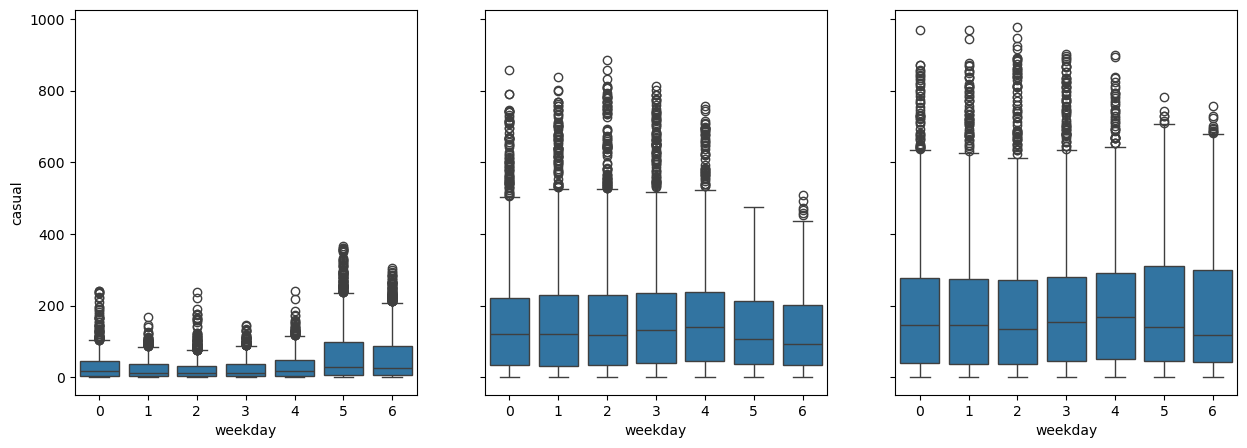

In [25]:
ig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize = (15,5), sharey=True)
sns.boxplot(x='weekday', y='casual', data=bikes_daily, ax=ax1)
sns.boxplot(x='weekday', y='registered', data=bikes_daily, ax=ax2)
sns.boxplot(x='weekday', y='count', data=bikes_daily, ax=ax3)

<Axes: xlabel='temp', ylabel='count'>

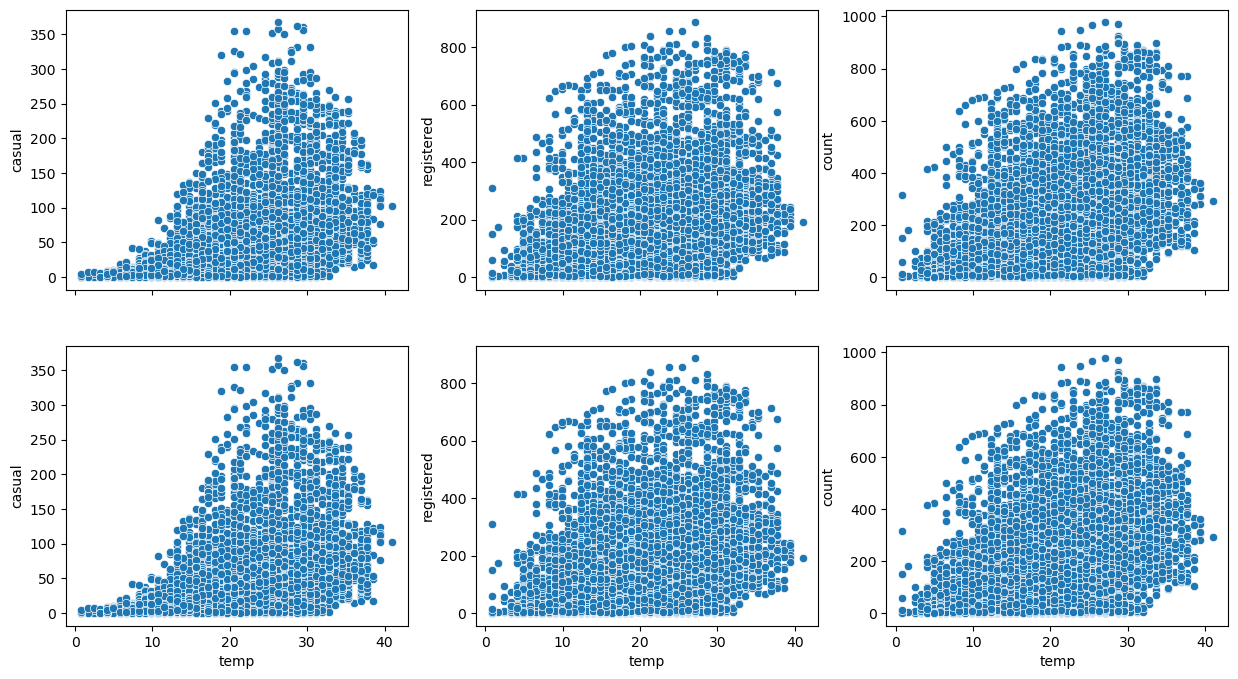

In [26]:
# look at continuous variables 
#temp and rentals 

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,8), sharey=False, sharex=True)
sns.scatterplot(x='temp', y='casual', data=bikes, ax=ax1)
sns.scatterplot(x='temp', y='registered', data=bikes, ax=ax2)
sns.scatterplot(x='temp', y='count', data=bikes, ax=ax3)
sns.scatterplot(x='temp', y='casual', data=bikes_daily, ax=ax4)
sns.scatterplot(x='temp', y='registered', data=bikes_daily, ax=ax5)
sns.scatterplot(x='temp', y='count', data=bikes_daily, ax=ax6)

comparing hourly temp with mjuber of bike rental on tip 
bottom looking at avg daily temp with 

<Axes: xlabel='temp', ylabel='count'>

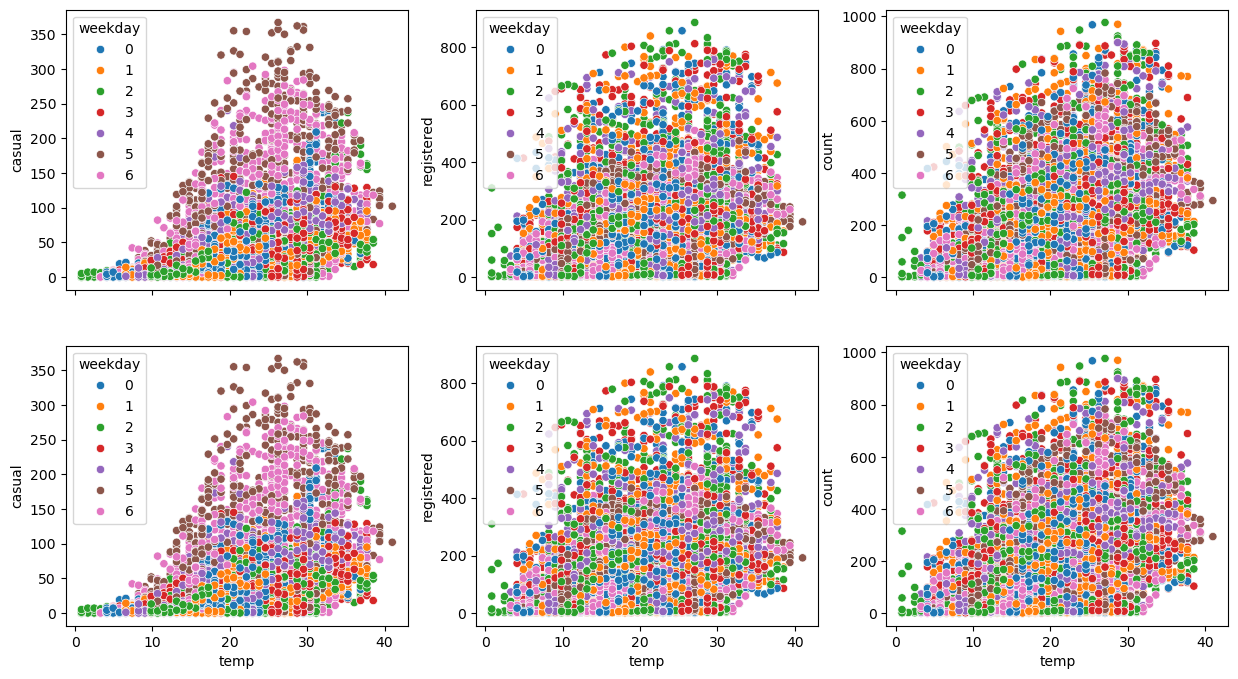

In [27]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,8), sharey=False, sharex=True)
sns.scatterplot(x='temp', y='casual', hue='weekday', data=bikes, ax=ax1, palette="tab10")
sns.scatterplot(x='temp', y='registered',  hue='weekday', data=bikes, ax=ax2, palette="tab10")
sns.scatterplot(x='temp', y='count',  hue='weekday', data=bikes, ax=ax3, palette="tab10")
sns.scatterplot(x='temp', y='casual',  hue='weekday', data=bikes_daily, ax=ax4, palette="tab10")
sns.scatterplot(x='temp', y='registered',  hue='weekday', data=bikes_daily, ax=ax5, palette="tab10")
sns.scatterplot(x='temp', y='count',  hue='weekday', data=bikes_daily, ax=ax6, palette="tab10")

temp and day of week is important together 


build a linear regression in statsmodels 


In [28]:
from statsmodels.formula.api import ols

In [29]:
results=ols('casual~ temp', data=bikes).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     3037.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:13:15   Log-Likelihood:                -56684.
No. Observations:               10886   AIC:                         1.134e+05
Df Residuals:                   10884   BIC:                         1.134e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.5710      1.178    -20.855      0.0

In [30]:
# for this function abouve y= 2.9951x -24.57 this implies that when temp zero we rent negative bikes and usually when dont make sense its indicator that dont have enough data 
# p value will tell if independent variable is stat sig if less than .05 it is stat sig 
# stat sig can change depending on combination of variables you have in your anaysis just ebcasue ots there does not mean it will always be significant 


In [31]:
results = ols("casual ~ temp", data=bikes_daily[~bikes_daily['weekday'].isin([5,6])]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     3622.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:13:15   Log-Likelihood:                -35983.
No. Observations:                7723   AIC:                         7.197e+04
Df Residuals:                    7721   BIC:                         7.198e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.6755      0.814    -24.181      0.0

In [32]:
# add categorical variable --> need to create dumies for categories 
# dummy variables represented as zeros and ones 

In [33]:
bikes_daily.dropna(inplace=True)

In [34]:
# couple ways to create dummy 
season_dummies = pd.get_dummies(bikes_daily['season'])

In [35]:
bikes_daily['workingday'].unique()

array([0, 1])

In [36]:
# have to do this for every categorical --> called one hot encoding any ML model will have to do one hot 

In [37]:
bikes_daily = pd.concat([bikes_daily, season_dummies], axis=1)

when have categorical looks numeric but has categorical number need to change to dummy variables can use getdummy and concat them back into data set  do only for categorical that are not binary 

In [38]:
bikes_daily

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,time_of_day,weekday,1,2,3,4
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,late_night,5,True,False,False,False
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,late_night,5,True,False,False,False
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,late_night,5,True,False,False,False
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,morning_commute,5,True,False,False,False
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,morning_commute,5,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,evening_commute,2,False,False,False,True
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,after_hours,2,False,False,False,True
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,after_hours,2,False,False,False,True


In [39]:
season_dummies = pd.get_dummies(bikes_daily['season'], dtype=int)

In [40]:
season_dummies

,1,2,3,4
datetime,,,,
2011-01-01 00:00:00,1,0,0,0
2011-01-01 01:00:00,1,0,0,0
2011-01-01 02:00:00,1,0,0,0
2011-01-01 03:00:00,1,0,0,0
2011-01-01 04:00:00,1,0,0,0
...,...,...,...,...
2012-12-19 19:00:00,0,0,0,1
2012-12-19 20:00:00,0,0,0,1
2012-12-19 21:00:00,0,0,0,1


In [41]:
#difference in y = mx+ b for cat or not when make predictions on when add categorical function evolves and when make prdictions only have one or zero
# x can only be one or zero coefficents of categorical will be much larger 

In [42]:
bikes_daily[(~bikes_daily['weekday'].isin([5,6])) & (bikes_daily['temp'] >19) & (bikes_daily ['temp'] < 21)]['casual'].mean()

25.221917808219178

In [43]:
# dont add 4th variable beacuse if all other 3 are zero it has to be season 4 its a debate of if to put it or not 
# categorical variables come in packages 


In [44]:
results = ols("casual ~ temp + season1 + season2 + season3", data=bikes_daily[~bikes_daily['weekday'].isin([5,6])]).fit()
print(results.summary())

PatsyError: Error evaluating factor: NameError: name 'season1' is not defined
    casual ~ temp + season1 + season2 + season3
                    ^^^^^^^

In [ ]:
#when want to make predicitions can just put parameters into this function
predicted_vals = results.predict(bikes_daily[['temp','season1','season2','season3']]) 
# residual value is diff between actual and what model predicted 

In [ ]:
residuals = bikes_daily['casual'] - predicted_vals

In [ ]:
residuals

datetime
2011-01-01 00:00:00    0.279886
2011-01-01 01:00:00    7.607394
2011-01-01 02:00:00    4.607394
2011-01-01 03:00:00    0.279886
2011-01-01 04:00:00   -2.720114
                         ...   
2012-12-19 19:00:00   -8.605597
2012-12-19 20:00:00   -3.278089
2012-12-19 21:00:00   -6.950582
2012-12-19 22:00:00    1.049418
2012-12-19 23:00:00   -4.623074
Length: 10886, dtype: float64

In [ ]:
#get rid of positive/ negative signs 
residuals**2

datetime
2011-01-01 00:00:00     0.078336
2011-01-01 01:00:00    57.872440
2011-01-01 02:00:00    21.228078
2011-01-01 03:00:00     0.078336
2011-01-01 04:00:00     7.399019
                         ...    
2012-12-19 19:00:00    74.056297
2012-12-19 20:00:00    10.745869
2012-12-19 21:00:00    48.310585
2012-12-19 22:00:00     1.101279
2012-12-19 23:00:00    21.372813
Length: 10886, dtype: float64

In [ ]:
# first square the residuals
# then take the sqrt of the mean 
np.mean(np.sqrt(residuals**2))

25.86054697384095

to know if good or bad need to put agains specific conditions 


In [ ]:
bikes_daily[(~bikes_daily['weekday'].isin([5,6]))]['casual'].mean()

26.06098666321378

In [ ]:
# you have to decide what is good or bad may have higer toleraene or not if over 30% thats a problem subjective decision on how accurate you have to be 

<Axes: ylabel='Count'>

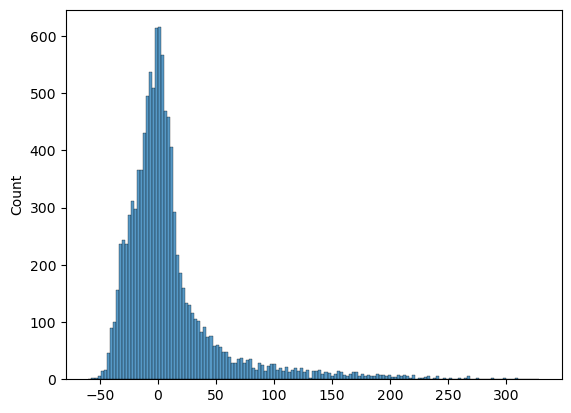

In [ ]:
sns.histplot(residuals)

In [ ]:
final_residuals = pd.concat([bikes_daily['casual'],predicted_vals, residuals], axis=1)